In [298]:
#1. Importing the libraries:

# !pip install matplotlib
# !pip install seaborn
#!pip install scikit-learn
#!pip install imblearn
# !pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import roc_auc_score
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [299]:
#2. Loading the Data:
data = pd.read_csv('winequality-white.csv', sep=';')
# Display the first 5 rows of the DataFrame
data.head()
# Get a concise summary of the DataFrame
data.info()
# Some descriptive statistical measures of the dataset
data.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


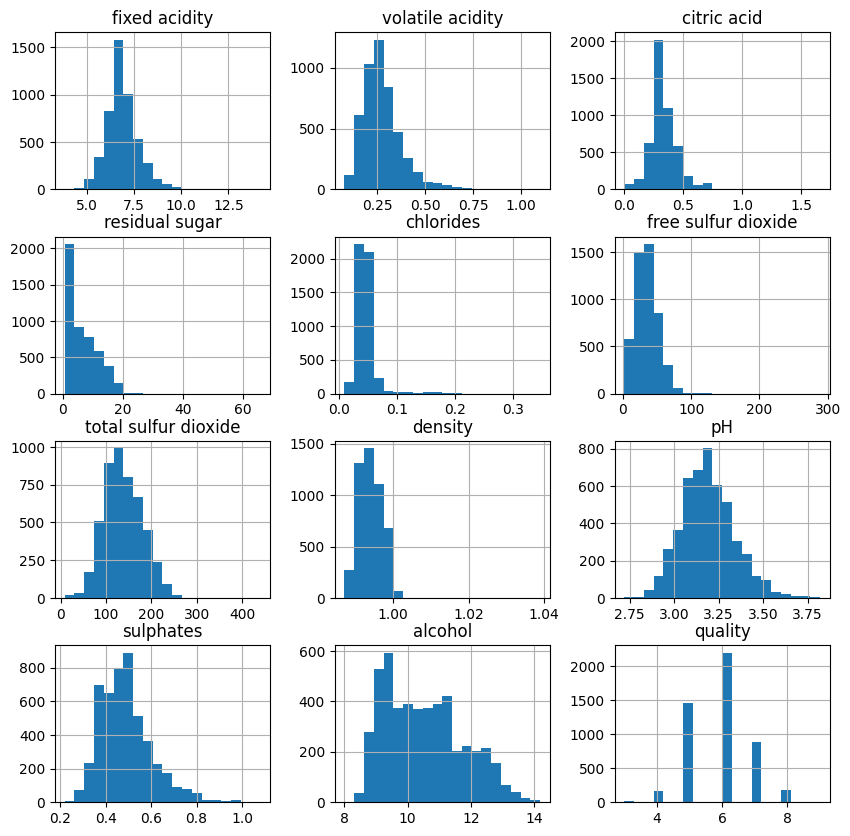

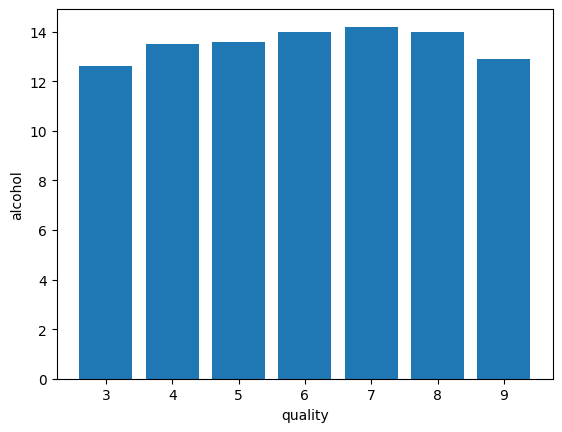

In [300]:
#3. Analyzing and processing wine data
#Exploratory Data Analysis (EDA)
    #a. Checking for null values(Sum of null values column wise):
data.isnull().sum()
    #b. Visualize the data:
data.hist(bins=20, figsize=(10, 10))
plt.show()

    #Now let’s draw the count plot to visualise the number data for each quality of wine.
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

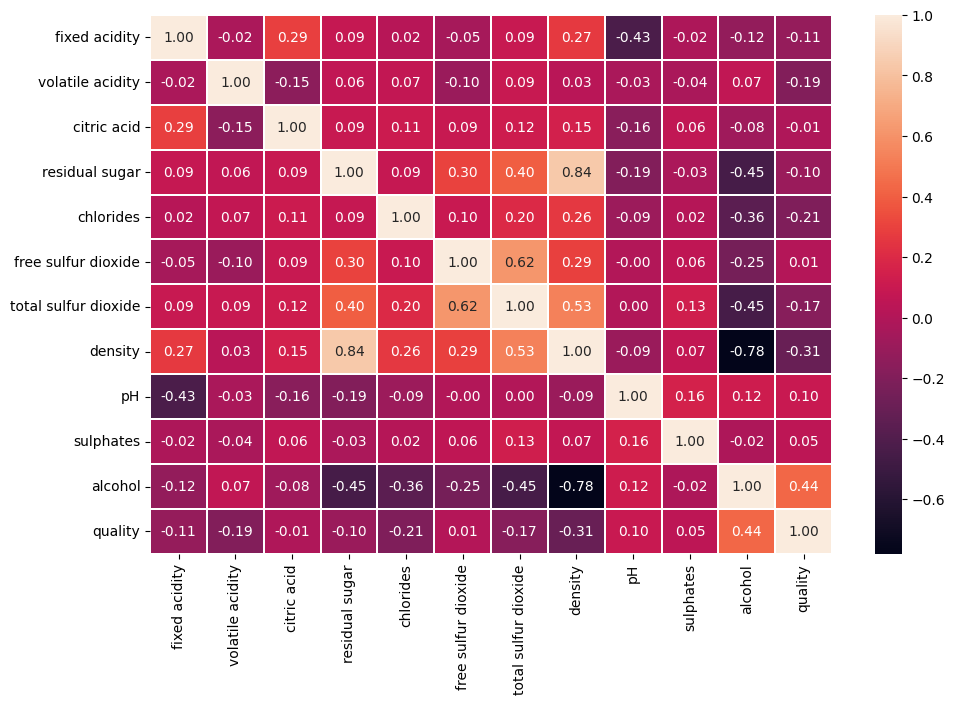

In [301]:
    #c. Analyzing the correlation between the variables:
#There are times the data provided to us contains redundant features they do not help with increasing the model’s performance 
#that is why we will remove them before using them to train our model.
# plt.figure(figsize=(12, 12))
# sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.subplots(figsize=(11,7))
sb.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=0.3,linecolor='white')
plt.show()


In [302]:
#From the above heat map we can conclude that the ‘density’ and ‘residual sugar‘ are highly correlated features so, we will remove them.
data = data.drop('density', axis=1)

In [303]:
    #d. Converting numerical data to categorical data:
#Map quality into categories
conditions = [
    (data['quality'] <= 4),
    (data['quality'] >= 5) & (data['quality'] <= 7),
    (data['quality'] >= 8)
]
choices = ['Low', 'Average', 'High'] 
data['quality'] = np.select(conditions, choices)
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [304]:
    #e. Splitting features and labels
X = data.drop('quality', axis=1)  # Features
y = data['quality']               # Target variable

    #f . Splitting training, testing, and validation data:
# Split data into training and remaining data (80% - 20%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=42)

# Split the remaining data into testing and validation sets (50% - 50%)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(X_val))

    #g. Normalizing the features:
# norm = MinMaxScaler()
# X_train = norm.fit_transform(X_train)
# X_test = norm.transform(X_test)

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the labels to integers
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Do the same transformation for the test set



3918
490
490


In [305]:
#4. Model Development
# Initialize and train a RandomForest and XGB classifier

    #a. Model fitting:
# models = [RandomForestClassifier(random_state=42), LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)]
models = [RandomForestClassifier(random_state=42), xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)]

for i in range(2):
    models[i].fit(X_train, y_train_encoded)
    print(f'{models[i]} : ')


RandomForestClassifier(random_state=42) : 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...) : 


In [309]:
#5. Evaluate the model:
#Predict and evaluate:
#Use the test data to evaluate the models' performance.
#Calculate accuracy, precision, and recall for each model to determine their effectiveness.

predictions = models[0].predict(X_test)
# If needed, inverse transform the predictions back to original labels
y_pred_labels = le.inverse_transform(predictions)
print(classification_report(y_test, y_pred_labels))



predictions = models[1].predict(X_test)
# If needed, inverse transform the predictions back to original labels
y_pred_labels = le.inverse_transform(predictions)
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

     Average       0.96      1.00      0.98       459
        High       1.00      0.58      0.73        19
         Low       0.60      0.25      0.35        12

    accuracy                           0.96       490
   macro avg       0.85      0.61      0.69       490
weighted avg       0.96      0.96      0.95       490

              precision    recall  f1-score   support

     Average       0.96      0.98      0.97       459
        High       0.73      0.58      0.65        19
         Low       0.33      0.17      0.22        12

    accuracy                           0.95       490
   macro avg       0.68      0.58      0.61       490
weighted avg       0.94      0.95      0.94       490



ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:quality: object

In [307]:
# import joblib

# # Save model
# joblib.dump(model, 'wine_quality_classifier.joblib')
